# Feature Engineering

Feature Engineering is applied to a dataset to obtain more effective models with the domain knowledge guide.

Feature Engineering can be proceduralized as follows;

1. <a href='#feature_selection_section'><b>Feature Selection</b></a>
2. <a href='#encoding_section'><b>Encoding</b></a>
3. <a href='#feature_scaling_section'><b>Feature Scaling</b></a><br>
4. <a href='#storing_section'><b>Storing The Data</b></a><br>
5. <a href='#conclusion_section'><b>Conclusion</b></a><br>

---

## Data Read

In [1]:
# Import necessary libraries for data obtaining
import pandas as pd

In [2]:
# Read the data into a data frame
cleaned_data = pd.read_csv('RFM_Clusters.csv')

In [3]:
cleaned_data.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Country'], dtype='object')

---

<a id='feature_selection_section'></a>
## 1. Feature Selection

In this section, features, which are going to be used in the models, are selected by considering Data Exploration step results and domain knowledge.

In [ ]:
# There is no feature to be selected.
# However, only Recency, Frequency and Monetary features are going to be used in models.
# Also, there are outliers that need to be removed.

In [4]:
# A new data frame to identify removed outliers
rfm_clusters = cleaned_data.copy(deep=True)

In [5]:
# Outlier removal with a statitical approach
# cleaned_data = cleaned_data >= Q1-1.5IQR & cleaned_data <= Q3+1.5IQR
# IQR(Inter Quartile Range) = Q3 - Q1

Recency_Q1 = rfm_clusters.Recency.quantile(0.05)
Recency_Q3 = rfm_clusters.Recency.quantile(0.95)
Recency_IQR = Recency_Q3 - Recency_Q1

Frequency_Q1 = rfm_clusters.Frequency.quantile(0.05)
Frequency_Q3 = rfm_clusters.Frequency.quantile(0.95)
Frequency_IQR = Frequency_Q3 - Frequency_Q1

Monetary_Q1 = rfm_clusters.Monetary.quantile(0.05)
Monetary_Q3 = rfm_clusters.Monetary.quantile(0.95)
Monetary_IQR = Monetary_Q3 - Monetary_Q1

In [6]:
rfm_clusters = rfm_clusters[(rfm_clusters['Recency'] >= (Recency_Q1 - 1.5*Recency_IQR)) & \
                          (rfm_clusters['Recency'] <= (Recency_Q3 + 1.5*Recency_IQR))]

rfm_clusters = rfm_clusters[(rfm_clusters['Frequency'] >= (Frequency_Q1 - 1.5*Frequency_IQR)) & \
                          (rfm_clusters['Frequency'] <= (Frequency_Q3 + 1.5*Frequency_IQR))]

rfm_clusters = rfm_clusters[(rfm_clusters['Monetary'] >= (Monetary_Q1 - 1.5*Monetary_IQR)) & \
                          (rfm_clusters['Monetary'] <= (Monetary_Q3 + 1.5*Monetary_IQR))]

In [7]:
cleaned_data.shape

(4372, 5)

In [8]:
rfm_clusters.shape

(4296, 5)

<a id='encoding_section'></a>
## 2. Encoding

There is no categorical feature that needs to be encoded.

---

<a id='feature_scaling_section'></a>
## 3. Feature Scaling

In [9]:
# Necessary library
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'With Outliers')]

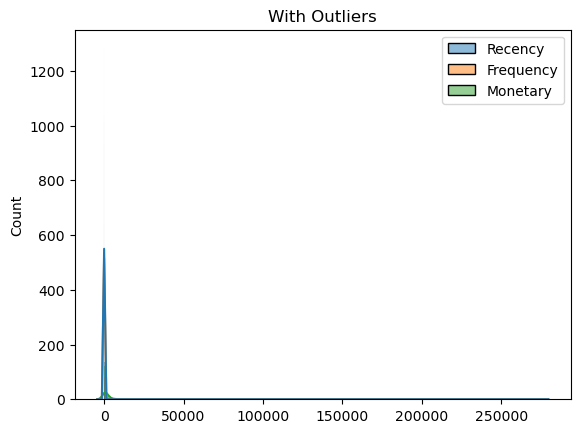

In [10]:
# Recency, Frequency and Monetary distribution in the dataset
fig = sns.histplot(cleaned_data.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='With Outliers')

---

In [11]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [12]:
standard_scaler = StandardScaler()
standardized = rfm_clusters.copy(deep=True)
standardized.loc[:,['Recency', 'Frequency', 'Monetary']] = standard_scaler.fit_transform(standardized.loc[:,['Recency', 'Frequency', 'Monetary']])
standardized = pd.DataFrame(standardized)

[Text(0.5, 1.0, 'Standard Scaled')]

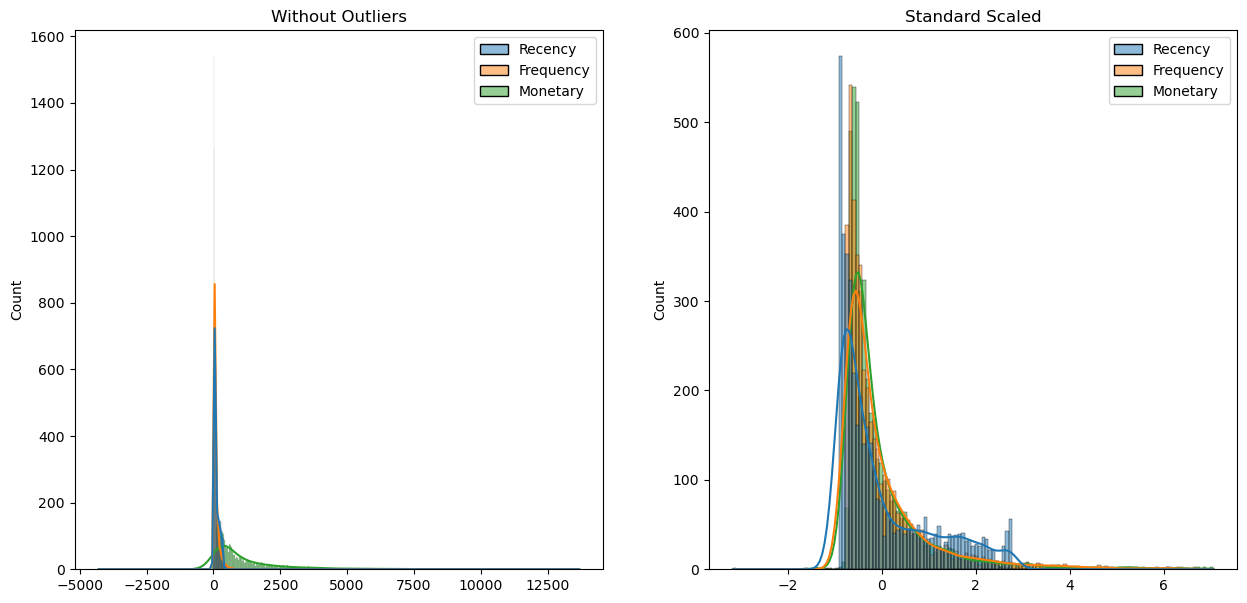

In [13]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
fig = sns.histplot(rfm_clusters.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Without Outliers')

plt.subplot(1,2,2)
fig = sns.histplot(standardized.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Standard Scaled')

---

In [14]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

In [15]:
min_max_scaler = MinMaxScaler()
normalized = rfm_clusters.copy(deep=True)
normalized.loc[:,['Recency', 'Frequency', 'Monetary']] = min_max_scaler.fit_transform(normalized.loc[:,['Recency', 'Frequency', 'Monetary']])
normalized = pd.DataFrame(normalized)

[Text(0.5, 1.0, 'MinMax Scaled(Normalized)')]

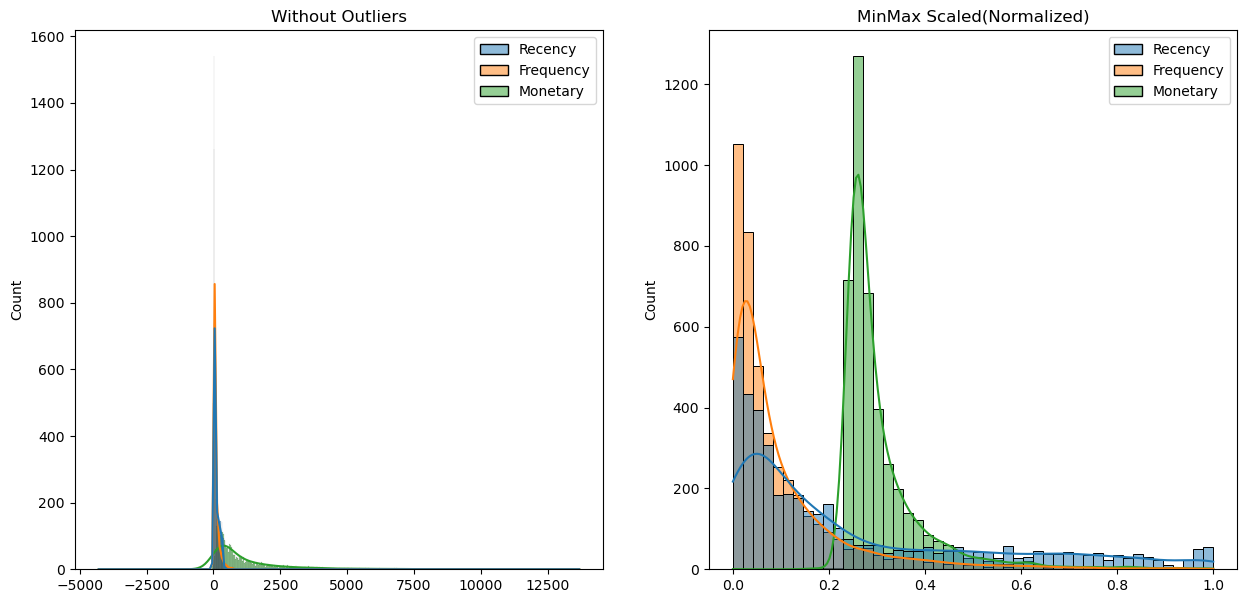

In [16]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
fig = sns.histplot(rfm_clusters.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Without Outliers')

plt.subplot(1,2,2)
fig = sns.histplot(normalized.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='MinMax Scaled(Normalized)')

---

In [17]:
# Maximum Absolute Scaling
from sklearn.preprocessing import MaxAbsScaler

In [18]:
max_abs_scaler = MaxAbsScaler()
max_abs_scaled = rfm_clusters.copy(deep=True)
max_abs_scaled.loc[:,['Recency', 'Frequency', 'Monetary']] = max_abs_scaler.fit_transform(max_abs_scaled.loc[:,['Recency', 'Frequency', 'Monetary']])
max_abs_scaled = pd.DataFrame(max_abs_scaled)

[Text(0.5, 1.0, 'Maximum Absolute Scaling')]

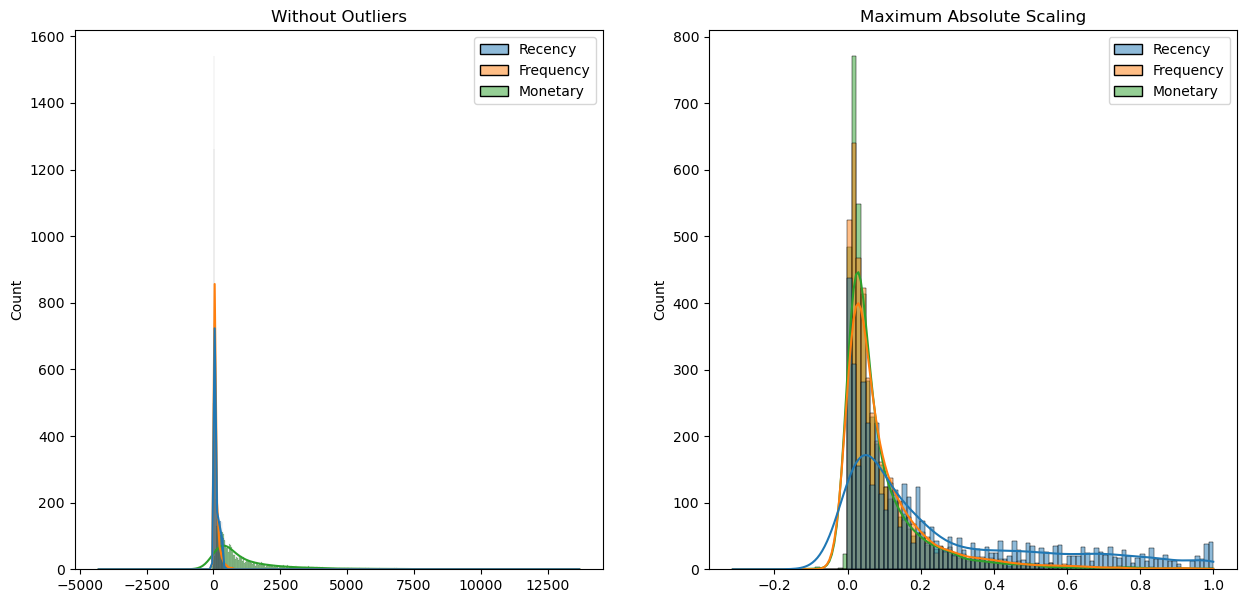

In [19]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
fig = sns.histplot(rfm_clusters.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Without Outliers')

plt.subplot(1,2,2)
fig = sns.histplot(max_abs_scaled.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Maximum Absolute Scaling')

---

In [20]:
# Robust Scaling
from sklearn.preprocessing import RobustScaler

In [21]:
robust_scaler = RobustScaler()
robust_scaled = rfm_clusters.copy(deep=True)
robust_scaled.loc[:,['Recency', 'Frequency', 'Monetary']] = robust_scaler.fit_transform(robust_scaled.loc[:,['Recency', 'Frequency', 'Monetary']])
robust_scaled = pd.DataFrame(robust_scaled)

[Text(0.5, 1.0, 'Robust Scaling')]

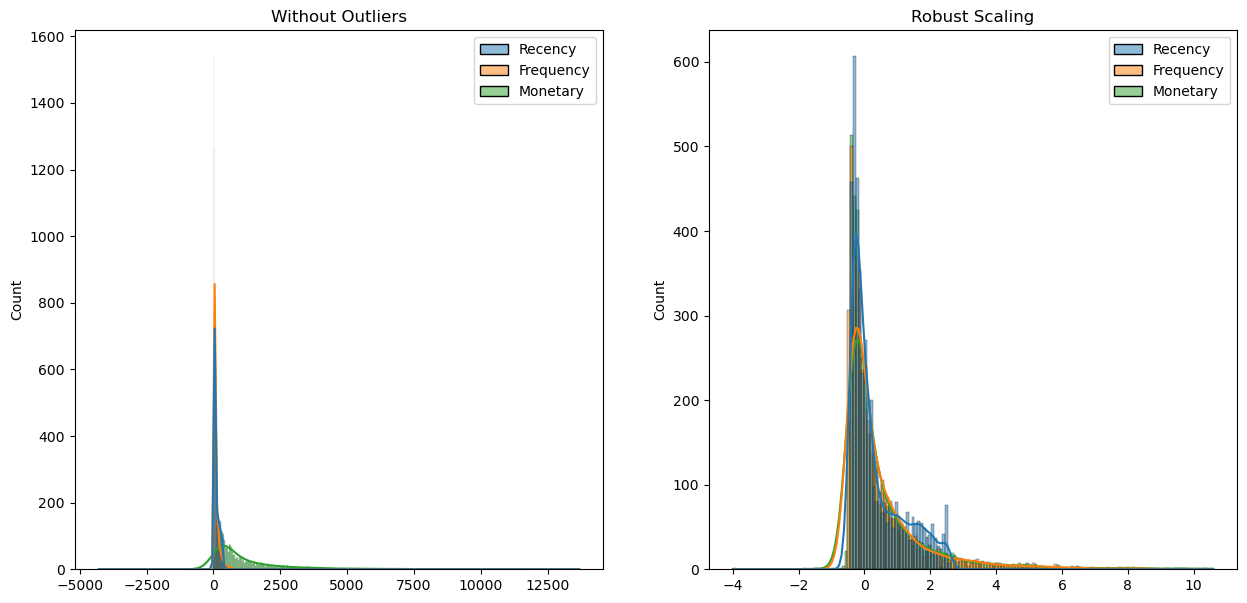

In [22]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
fig = sns.histplot(rfm_clusters.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Without Outliers')

plt.subplot(1,2,2)
fig = sns.histplot(robust_scaled.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Robust Scaling')

---

In [23]:
# Quantile Transformer Scaling
from sklearn.preprocessing import QuantileTransformer

In [24]:
quantile_transformer = QuantileTransformer()
quantile_transformed = rfm_clusters.copy(deep=True)
quantile_transformed.loc[:,['Recency', 'Frequency', 'Monetary']] = quantile_transformer.fit_transform(quantile_transformed.loc[:,['Recency', 'Frequency', 'Monetary']])
quantile_transformed = pd.DataFrame(quantile_transformed)

[Text(0.5, 1.0, 'Quantile Transformer Scaling')]

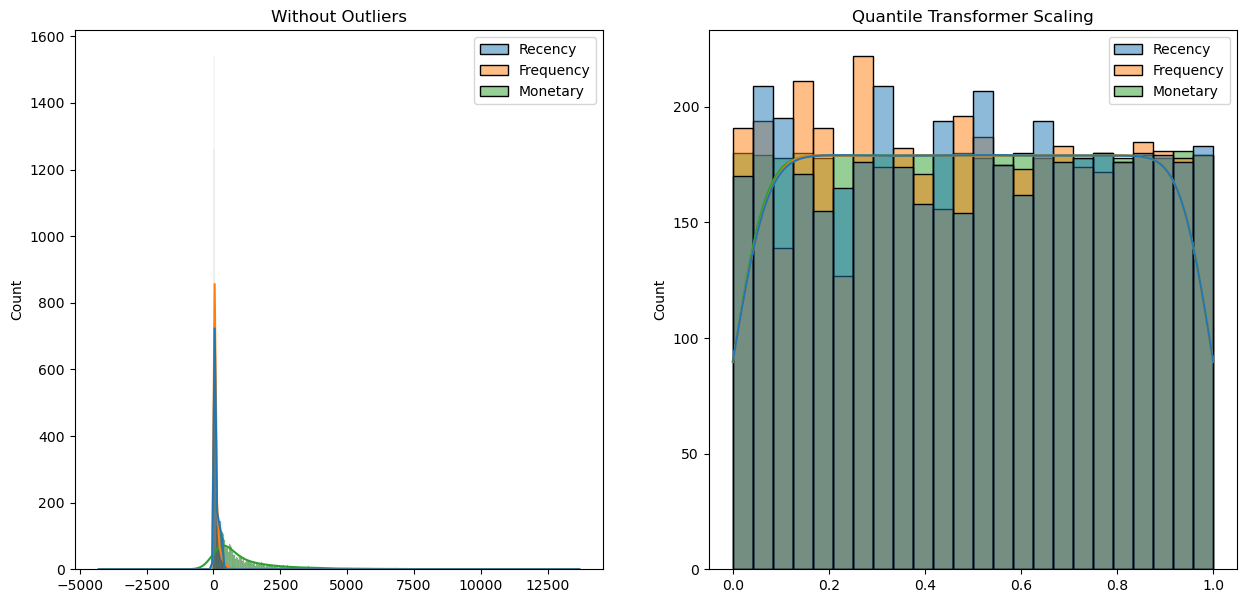

In [25]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
fig = sns.histplot(rfm_clusters.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Without Outliers')

plt.subplot(1,2,2)
fig = sns.histplot(quantile_transformed.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Quantile Transformer Scaling')

---

In [26]:
# Power Transformer Scaling (with Yeo-Johnson Transform)
from sklearn.preprocessing import power_transform

In [27]:
powered = rfm_clusters.copy(deep=True)
powered.loc[:,['Recency', 'Frequency', 'Monetary']] = power_transform(powered.loc[:,['Recency', 'Frequency', 'Monetary']], method='yeo-johnson')
powered = pd.DataFrame(powered)

[Text(0.5, 1.0, 'Power Transformer Scaling')]

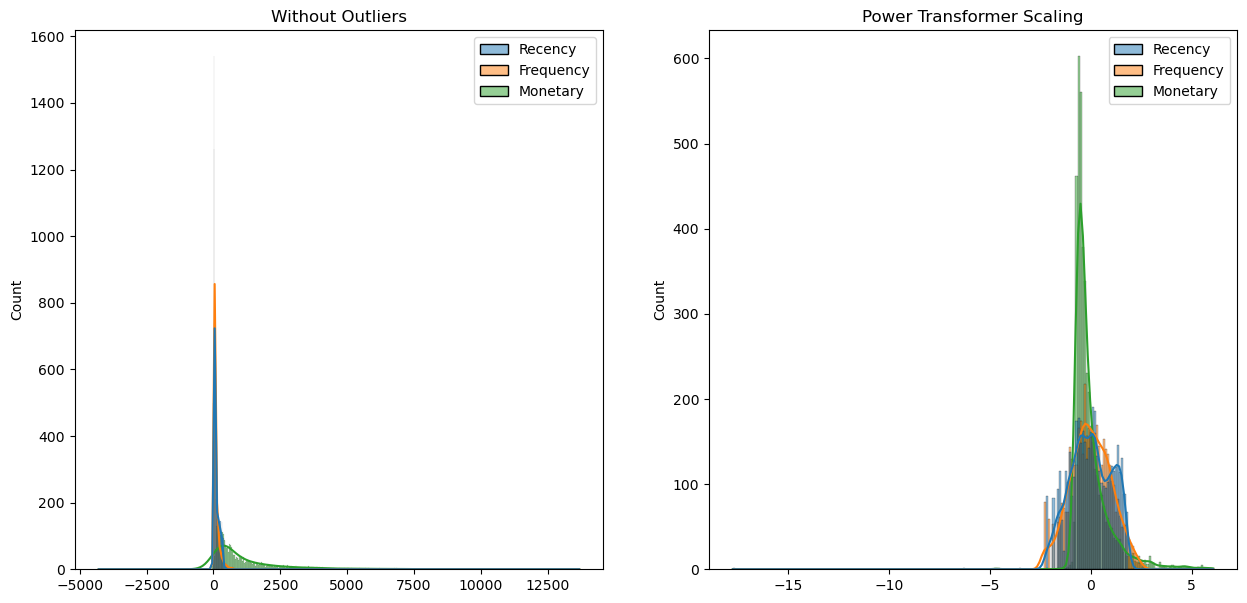

In [28]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
fig = sns.histplot(rfm_clusters.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Without Outliers')

plt.subplot(1,2,2)
fig = sns.histplot(powered.loc[:,['Recency', 'Frequency', 'Monetary']], kde=True)
fig.set(title='Power Transformer Scaling')

---

<a id='storing_section'></a>
## 4. Storing The Data

The data that is applied feature engineering method is stored in this section.

In [29]:
# Stroing the transformed data

standardized.to_csv('Transformed_Data_Standardized.csv', index=False)
normalized.to_csv('Transformed_Data_Normalized.csv', index=False)
max_abs_scaled.to_csv('Transformed_Data_Maximum_Absolute_Scaled.csv', index=False)
robust_scaled.to_csv('Transformed_Data_Robust_Scaled.csv', index=False)
quantile_transformed.to_csv('Transformed_Data_Quantile_Transformed.csv', index=False)
powered.to_csv('Transformed_Data_Powered.csv', index=False)

<a id='conclusion_section'></a>
## 5. Conclusion

In [ ]:
# General summary of the scaled dataset is presented here. Also, necessary advices is propesed etc. ...

In this project, there is no selected feature. However, only Recency, Frequency and Monetary features are going to be used in the models. Also, there are some outliers in the cleaned dataset. Therefore, a statistical method for the outlier removal is used. On the other hand, there is no encoded feature. Last of this part, outliers removed dataset is scaled with several scaling methods such as Standardization, Normalization, Maximum Absolute Scaling, Robust Scaling, Quantile Transformation and Power Scaling. All these scaling methods are applied on the Recency, Frequency and Monetary features only. After that, all scaling method results are stored in different files that have csv extension.

---